

---

 # Capstone Project - 2(2025)
              BY - LIKITH


---



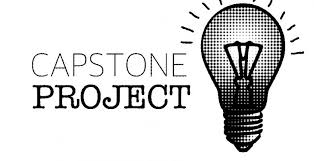



---


#Problem Statement 1:


---





---


# Given data about COVID-19 patients, write code to visualize the impact andanalyze the trend of rate of infection and recovery as well as make predictionsabout the number of cases expected a week in future based on the current trends.


---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from prophet import Prophet
import os


In [ ]:
df = pd.read_csv("/content/covid_19_clean_complete.csv")
df

Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
df.describe()

Lat          Long     Confirmed         Deaths     Recovered  \
count  49068.000000  49068.000000  4.906800e+04   49068.000000  4.906800e+04   
mean      21.433730     23.528236  1.688490e+04     884.179160  7.915713e+03   
std       24.950320     70.442740  1.273002e+05    6313.584411  5.480092e+04   
min      -51.796300   -135.000000  0.000000e+00       0.000000  0.000000e+00   
25%        7.873054    -15.310100  4.000000e+00       0.000000  0.000000e+00   
50%       23.634500     21.745300  1.680000e+02       2.000000  2.900000e+01   
75%       41.204380     80.771797  1.518250e+03      30.000000  6.660000e+02   
max       71.706900    178.065000  4.290259e+06  148011.000000  1.846641e+06   

             Active  
count  4.906800e+04  
mean   8.085012e+03  
std    7.625890e+04  
min   -1.400000e+01  
25%    0.000000e+00  
50%    2.600000e+01  
75%    6.060000e+02  
max    2.816444e+06

In [ ]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49063    False
49064    False
49065    False
49066    False
49067    False
Length: 49068, dtype: bool

In [ ]:
df.head()

Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [ ]:
data_dir = 'covid_data_files'


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.tail()

Province/State         Country/Region        Lat       Long       Date  \
49063            NaN  Sao Tome and Principe   0.186400   6.613100 2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388 2020-07-27   
49065            NaN                Comoros -11.645500  43.333300 2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100 2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600 2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa



---
# Confirmed cases over time


---




In [ ]:

fig = px.line(df, x='Date', y='Confirmed', title='COVID-19 Confirmed Cases Over Time', # Changed 'data' to 'df'
              labels={'Confirmed': 'Number of Cases'}, template='plotly_dark')
fig.show()



---
 # Plot recoveries and deaths over time


---




In [ ]:
fig = px.line(df, x='Date', y=['Recovered', 'Deaths'], title='COVID-19 Recoveries and Deaths Over Time',
              labels={'value': 'Number of Cases'}, template='plotly_dark')



---

# Use Facebook prophet library to make time series models


---



In [ ]:
prophet_data = df[['Date', 'Confirmed']].rename(columns={'Date': 'ds', 'Confirmed': 'y'})


In [ ]:
prophet_data.head()

ds  y
0 2020-01-22  0
1 2020-01-22  0
2 2020-01-22  0
3 2020-01-22  0
4 2020-01-22  0



---


# Model Building


---



In [ ]:
model = Prophet()
model.fit(prophet_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb3cun0cb/oixud7rs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb3cun0cb/q1wxywkf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52723', 'data', 'file=/tmp/tmpb3cun0cb/oixud7rs.json', 'init=/tmp/tmpb3cun0cb/q1wxywkf.json', 'output', 'file=/tmp/tmpb3cun0cb/prophet_modelk_a3ncfa/prophet_model-20250215043212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:32:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:32:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=7)

In [ ]:
forecast = model.predict(future)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

ds          yhat     yhat_lower     yhat_upper
188 2020-07-28  62202.602150  -99838.512078  219855.628705
189 2020-07-29  63000.454911 -101888.977199  233271.249286
190 2020-07-30  63800.816234  -92699.782763  243470.728723
191 2020-07-31  64606.827914  -97283.531794  235130.175316
192 2020-08-01  65394.691659  -82406.843744  231305.995001
193 2020-08-02  66137.608369  -94164.216433  222700.820849
194 2020-08-03  66865.726580  -88645.195651  229146.466413

In [ ]:
combined_data = pd.merge(df, forecast[['ds', 'yhat']], left_on='Date', right_on='ds', how='outer')


In [ ]:
fig = px.line(combined_data, x='Date', y=['Confirmed', 'yhat'],
              title='COVID-19 Actual vs Predicted Cases',
              labels={'value': 'Number of Cases'}, template='plotly_dark')
fig.show()

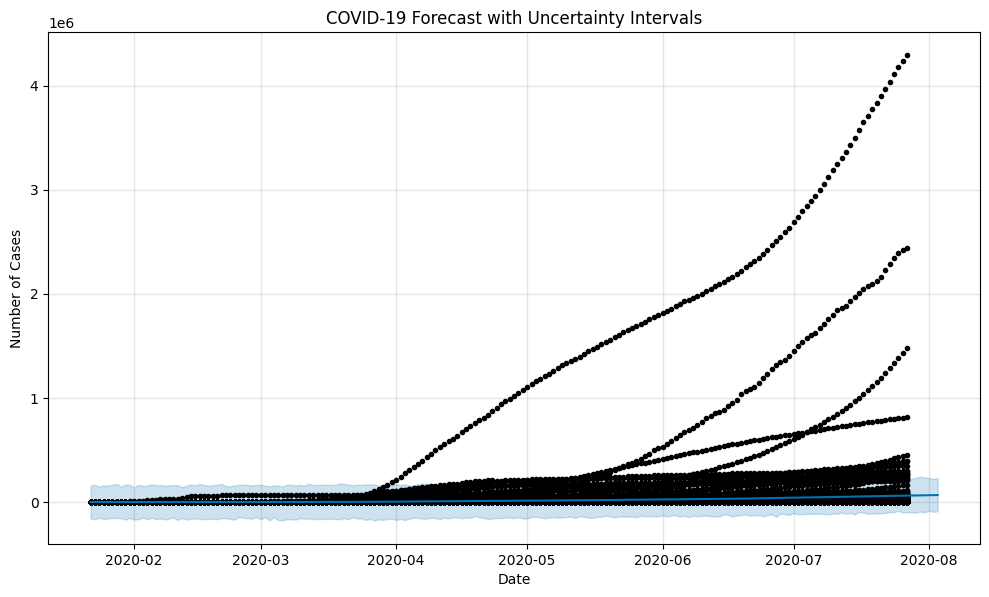

In [ ]:

fig = model.plot(forecast)
plt.title('COVID-19 Forecast with Uncertainty Intervals')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.show()

In [ ]:
# Save forecasted data to a CSV file
forecast.to_csv('/content/covid_19_clean_complete.csv', index=False)